This notebook is a demonstration of the entire Machine Translation pipeline (although we are trying to transliterate).

It goes through the pre-processing of data all the way to outputting a model that can be re-used later on. It even performs some basic evaluation namely plotting training and validation loss.

Works best on Japanese ('ja') as the Twitter data used contains higher portions of Japanese Tweets compared to other languages that are not English. Also the standard transliteration used when evaluating suitable name pairs works very well in Japanese.

This version correctly implements splitting the data into **training, testing and validation**.

In [1]:
language = 'ja'
import name_transliteration.filtering as filter
import name_transliteration.cleansing as cleanse
import name_transliteration.model_trainer_and_tester as model_trainer_and_tester

In [2]:
# filter testing and training data

my_filter = filter.Filter(language)
my_filter.filterData("./data/")

./data/stream-2021-03-07T03:05:07.831679.gz
./data/stream-2021-01-13T01:21:29.804195.gz
./data/stream-2021-01-13T04:07:46.253913.gz
./data/stream-2021-01-12T23:08:30.828340.gz
./data/stream-2021-01-13T03:38:20.383129.gz
./data/stream-2021-03-07T06:30:03.830030.gz
./data/stream-2021-01-13T04:37:35.200990.gz
./data/stream-2021-03-07T03:34:53.811604.gz
./data/stream-2021-04-17T07:23:41.809159.gz
./data/stream-2021-01-12T22:39:33.810384.gz
./data/stream-2021-03-06T03:25:42.946878.gz
./data/stream-2021-01-12T22:09:26.798946.gz
./data/stream-2021-03-07T04:06:04.938654.gz
./data/stream-2021-03-07T01:39:45.126113.gz
./data/stream-2021-03-07T08:30:55.833881.gz
./data/stream-2021-03-07T02:36:22.842559.gz
./data/stream-2021-03-06T01:33:50.975776.gz
./data/stream-2021-03-06T01:59:57.825571.gz
./data/stream-2021-03-07T07:50:03.791977.gz
./data/stream-2021-04-17T04:49:34.818794.gz
./data/stream-2021-03-06T00:38:21.058969.gz
./data/stream-2021-03-07T01:29:37.938029.gz
./data/stream-2021-01-13T00:02:2

In [3]:
# instantiate the cleanser
my_cleanser = cleanse.Cleanser()
# the split data is uncleansed btw
my_cleanser.splitTrainTest(my_filter.getDataFrame(), num_in_test_set=1000)
# this does the cleansing of the test datasets
my_cleanser.createTestDataSets()
# this does the cleansing of the training dataset
my_cleanser.createTrainDataSet(edit_threshold = 0)

In [4]:
my_cleanser.saveTestAndTrain()

Saved cleansed names as: 
train_0_edit_distance_language_cleansed.txt 17342 number of rows. 
test1_cleansed.txt 32 number of rows. 
test2_cleansed.txt 47 number of rows. 
test3_cleansed.txt 106 number of rows. 



In [5]:
trainer_and_tester = model_trainer_and_tester.ModelTrainerAndTester(
    language=language, 
    epochs=20
)
trainer_and_tester.runWholeTrainProcess('train_0_edit_distance_language_cleansed.txt')





from IPython.display import Audio
sound_file = './sound/beep-03.wav'
Audio(sound_file, autoplay=True)

Number of unique input tokens: 27
Number of unique output tokens: 1491
Max sequence length for inputs: 15
Max sequence length for outputs: 11
Epoch 1/20
434/434 [==============================] - 39s 83ms/step - loss: 2.1413 - accuracy: 0.6301 - val_loss: 1.6200 - val_accuracy: 0.6997
Epoch 2/20
434/434 [==============================] - 33s 77ms/step - loss: 1.5426 - accuracy: 0.7044 - val_loss: 1.3495 - val_accuracy: 0.7324
Epoch 3/20
434/434 [==============================] - 36s 84ms/step - loss: 1.2847 - accuracy: 0.7423 - val_loss: 1.1079 - val_accuracy: 0.7750
Epoch 4/20
434/434 [==============================] - 35s 80ms/step - loss: 1.0470 - accuracy: 0.7847 - val_loss: 0.9462 - val_accuracy: 0.8091
Epoch 5/20
434/434 [==============================] - 37s 85ms/step - loss: 0.8752 - accuracy: 0.8195 - val_loss: 0.8345 - val_accuracy: 0.8363
Epoch 6/20
434/434 [==============================] - 36s 84ms/step - loss: 0.7411 - accuracy: 0.8494 - val_loss: 0.7296 - val_accuracy: 0

INFO:tensorflow:Assets written to: ja_model_20/assets


In [6]:
trainer_and_tester.predict("yuzu")

('ゆず\n', 0.99782217)

In [7]:
trainer_and_tester.evaluateOnTestData("ja_model_20")


evaluating on test set with 0 edit threshold...
1/1 [==============================] - 1s 666ms/step - loss: 0.5236 - accuracy: 0.8977
test loss, test acc: [0.523586630821228, 0.8977272510528564]
evaluating on test set with 0.1 edit threshold...
2/2 [==============================] - 1s 14ms/step - loss: 1.0350 - accuracy: 0.8395
test loss, test acc: [1.0350300073623657, 0.8394584059715271]
evaluating on test set with 0.25 edit threshold...
4/4 [==============================] - 0s 26ms/step - loss: 1.2872 - accuracy: 0.8036
test loss, test acc: [1.2872000932693481, 0.8036020398139954]


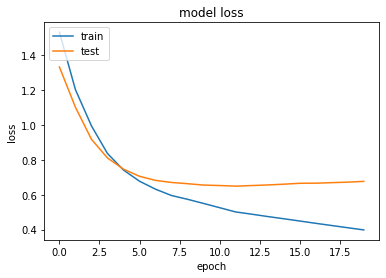

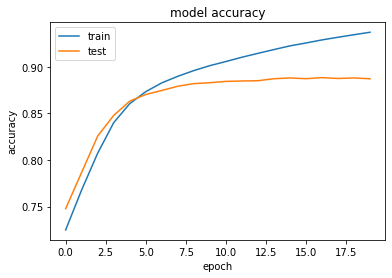

In [8]:
trainer_and_tester.plotLoss()
trainer_and_tester.plotAccuracy()

In [9]:
trainer_and_tester.saveTrainingStats()